# Multiple Linear Regression
## BoomBikes Bike Sharing Case Study
-----
#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

-----
####  Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 


## Step 1: Reading and Understanding the Data
    1.1 Inspecting the basic information of the BikeSharing dataframe
    1.2 Converting datatype
    1.3 Creating derived metric
    1.4 Dropping unnecessary columns
    1.5 Sanity test: 'casual' + 'registered'	= 'cnt'




Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Hiding Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Visualizing libs
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Reading the datataset
BikeSharing = pd.read_csv("bike_sharing.csv")
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Inspecting the BikeSharing dataframe

In [565]:
BikeSharing.shape

(730, 16)

In [566]:
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Initial observations:
- Dataset Size: 730 rows × 16 columns
- NO null values: All columns have 730 non-null values
- Column types:
    + 'dteday' is an object (string) representing the date.
    + Most variables are integers (season, yr, mnth, holiday, workingday, casual, registered, cnt)
    + Some numerical variables are floats (temp, atemp, hum, windspeed)
- Key columns:
    + 'cnt' (Total bike rentals) → Target variable.
    + 'casual' and 'registered' are subsets of cnt, so they should be removed before modeling.
    + 'season', 'weathersit', and 'mnth' have numeric labels but are actually categorical.
    + 'yr' (0 for 2018, 1 for 2019) may be useful as demand changes over years.

Cleaning up and Preparing the data:

In [567]:
BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.2  Converting datatype

In [568]:
# defining function for mapping data 

# Get season using season code 

# 1. season: (1:spring, 2:summer, 3:fall, 4:winter)
def convert_season_to_str(season:int ) ->str: # Do nothing if it has been converted
    if type(season) == str:
        return season
    season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
    return season_dict[season]

# Getting weather situation using weathersit code 
def convert_weathersit_to_str(ws: int) -> str:
    """
    weathersit : 
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    """
    if type(ws) == str: # Do nothing if it has been converted
        return ws 
    weather_sit_dict = {1:'clear', 2: 'mist', 3: 'light_snow', 4: 'rain'}
    return weather_sit_dict[ws]

# Getting month using month code 
def convert_month_to_str(m: int) -> str:
    """
    month_dict = {1:'mnth_1', 2:'mnth_2', 3: 'mnth_3', 4: 'mnth_4', 5: 'mnth_5', 6: 'mnth_6', 
                7:'mnth_7', 8: 'mnth_8',  9: 'mnth_9', 10: 'mnth_10', 11: 'mnth_11', 12: 'mnth_12'}
    """
    if type(m) == str: # Do nothing if it has been converted
        return m 
    month_dict = {1:'mnth_1', 2:'mnth_2', 3: 'mnth_3', 4: 'mnth_4', 5: 'mnth_5', 6: 'mnth_6', 
                7:'mnth_7', 8: 'mnth_8',  9: 'mnth_9', 10: 'mnth_10', 11: 'mnth_11', 12: 'mnth_12'}
    return month_dict[m] 

# Getting weekday using weekday code 
def convert_weekday_to_str(d: int) -> str:
    """
    weekday_dict = {0:'wkday_1', 2:'wkday_2', 3: 'wkday_3', 4: 'wkday_4', 5: 'wkday_5', 6: 'wkday_6'}
    """
    if type(d) == str: # Do nothing if it has been converted
        return d
    weekday_dict = {0:'wkday_0',1:'wkday_1' , 2:'wkday_2', 3: 'wkday_3', 4: 'wkday_4', 5: 'wkday_5', 6: 'wkday_6'}
    return weekday_dict[d] 

Converting datatypes:

In [569]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [570]:
def convert_bin_to_yes_no(x: int) -> str:
    if x in ['yes', 'no']: # Do nothing if it has been converted
        return x 
    elif x == 0:
        return 'no'
    else:
        return 'yes'
def convert_year_to_str(x: int) -> str:
    if x in ['2018', '2019']: # Do nothing if it has been converted
        return x 
    elif x == 0:
        return '2018'
    else:
        return '2019'


In [571]:
# Converting numerical 'season' to categorical 'season'
BikeSharing['season'] = BikeSharing['season'].apply(lambda x: convert_season_to_str(x))

# Converting numerical 'yr' to categorical 'yr'
BikeSharing['yr'] = BikeSharing['yr'].apply(lambda x: convert_year_to_str(x))

# Converting numerical 'mnth' to categorical 'mnth'
BikeSharing['mnth'] = BikeSharing['mnth'].apply(lambda x: convert_month_to_str(x))

# Converting numerical 'holiday' to categorical 'holiday'
BikeSharing['holiday'] = BikeSharing['holiday'].apply(lambda x: convert_bin_to_yes_no(x))

# Converting numerical 'weekday' to categorical 'weekday'
BikeSharing['weekday'] = BikeSharing['weekday'].apply(lambda x: convert_weekday_to_str(x))

# Converting numerical 'workingday' to categorical 'workingday'
BikeSharing['workingday'] = BikeSharing['workingday'].apply(lambda x: convert_bin_to_yes_no(x))

# Converting numerical 'weathersit' to categorical 'weathersit'
BikeSharing['weathersit'] = BikeSharing['weathersit'].apply(lambda x: convert_weathersit_to_str(x))


### 1.3 Creating derived metric(s)
As you can see, 'dtedat' means nothing in analysis, therefore we should create a derived var from this attribute

In [572]:
# Converting dteday to pandas datatime
BikeSharing['dteday'] = pd.to_datetime(BikeSharing['dteday'], format='%d-%m-%Y')

# Deriving 'days_from_start' metric from dteday
BikeSharing['days_from_start']= (BikeSharing['dteday'] - BikeSharing['dteday'].min()).dt.days


In [573]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
0,1,2018-01-01,spring,2018,mnth_1,no,wkday_6,no,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,spring,2018,mnth_1,no,wkday_0,no,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,spring,2018,mnth_1,no,wkday_1,yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,spring,2018,mnth_1,no,wkday_2,yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,spring,2018,mnth_1,no,wkday_3,yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


### 1.4 Sanity test: 'casual' + 'registered'	= 'cnt'

In [574]:
# Sanity test for 'cnt'
assert len(BikeSharing[BikeSharing.casual + BikeSharing.registered ==  BikeSharing.cnt]) == len(BikeSharing)

### 1.5 Dropping unnecessary columns

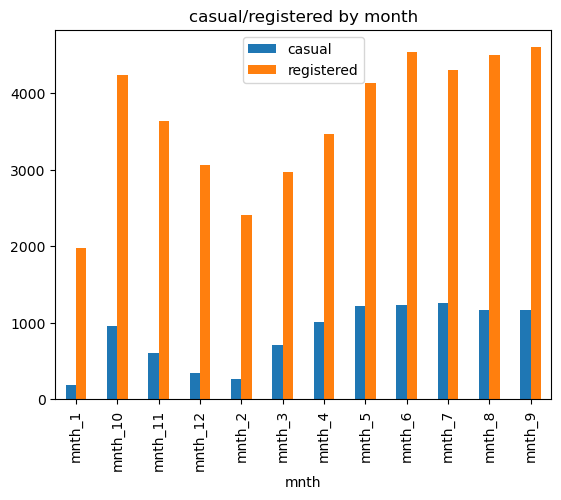

In [575]:
# dropping 2 unnecessary columns: 'instant', 'dteday'
BS = BikeSharing.drop(columns=['instant', 'dteday'])

# cnt = registered + casual. To avoid bias, we should drop 'casual' and 'registered'. However, we can take a look at them before dropping
BS.groupby('mnth')[['casual', 'registered']].mean().plot(kind='bar', title='casual/registered by month')
plt.show()

# Dropping the columns 'casual' and 'registered'
BS1 = BS.drop(columns=['casual', 'registered'])

In [576]:
BS1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start
0,spring,2018,mnth_1,no,wkday_6,no,mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,mnth_1,no,wkday_0,no,mist,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,2018,mnth_1,no,wkday_1,yes,clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,2018,mnth_1,no,wkday_2,yes,clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,2018,mnth_1,no,wkday_3,yes,clear,9.305237,11.46350,43.6957,12.522300,1600,4


## Step 2: Visualizing the data

In [577]:
# categorize variables into numerical vars and categorical vars
num_var_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_from_start'] # list of numerical vars
cate_var_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] # list of categorical vars
assert len(num_var_list) + len(cate_var_list) == len(BS1.columns)

### Visualizing numerical variables:

#### Let's make a pairplot of all the numeric variables

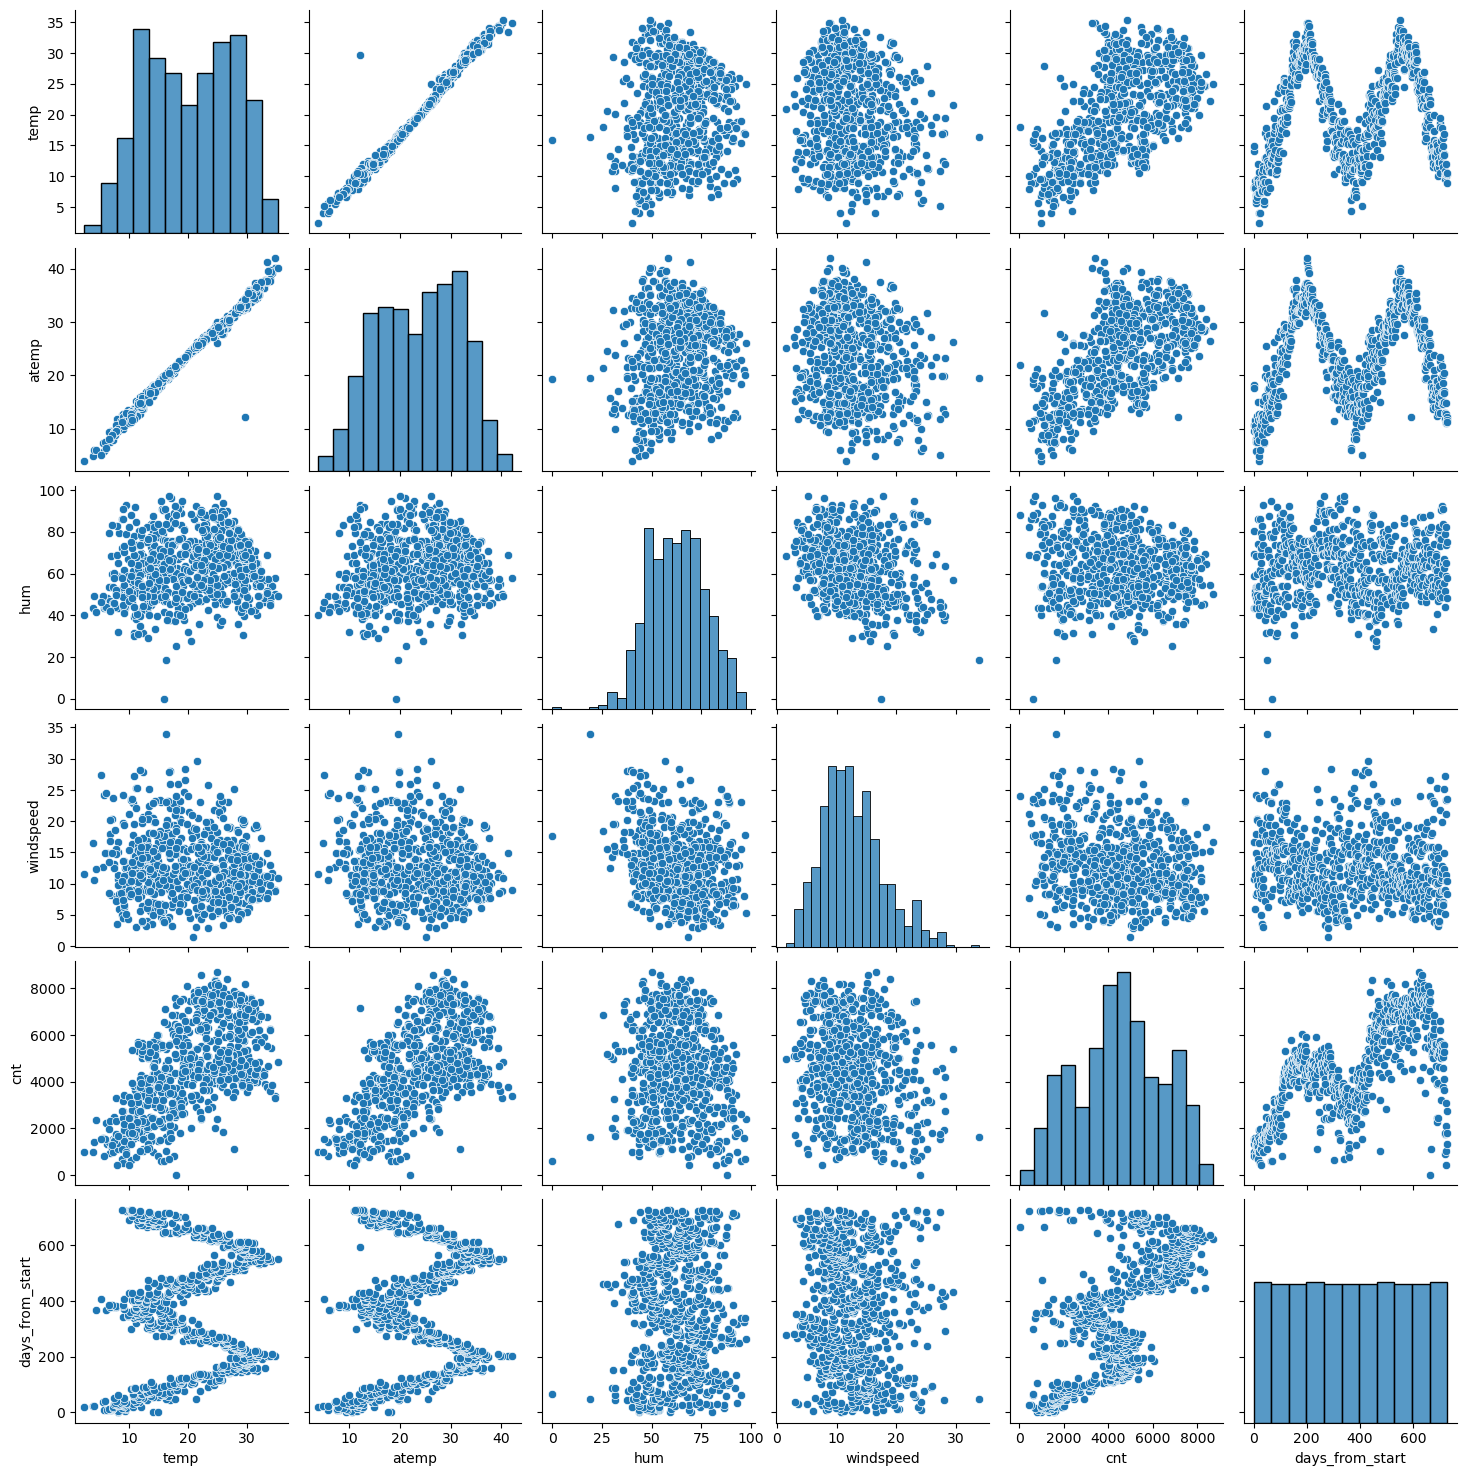

In [578]:
sns.pairplot(BS1[num_var_list])
plt.show()

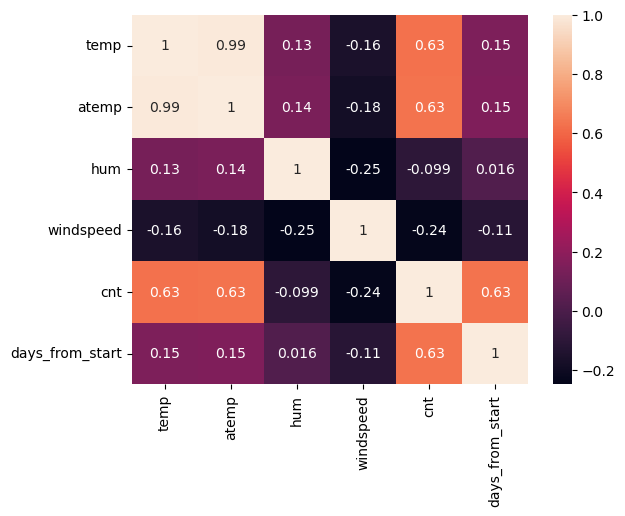

In [579]:
# correlation coefficient between vars
sns.heatmap(BS1[num_var_list].corr(), annot=True)
plt.show()

#### Visualising Categorical Variables

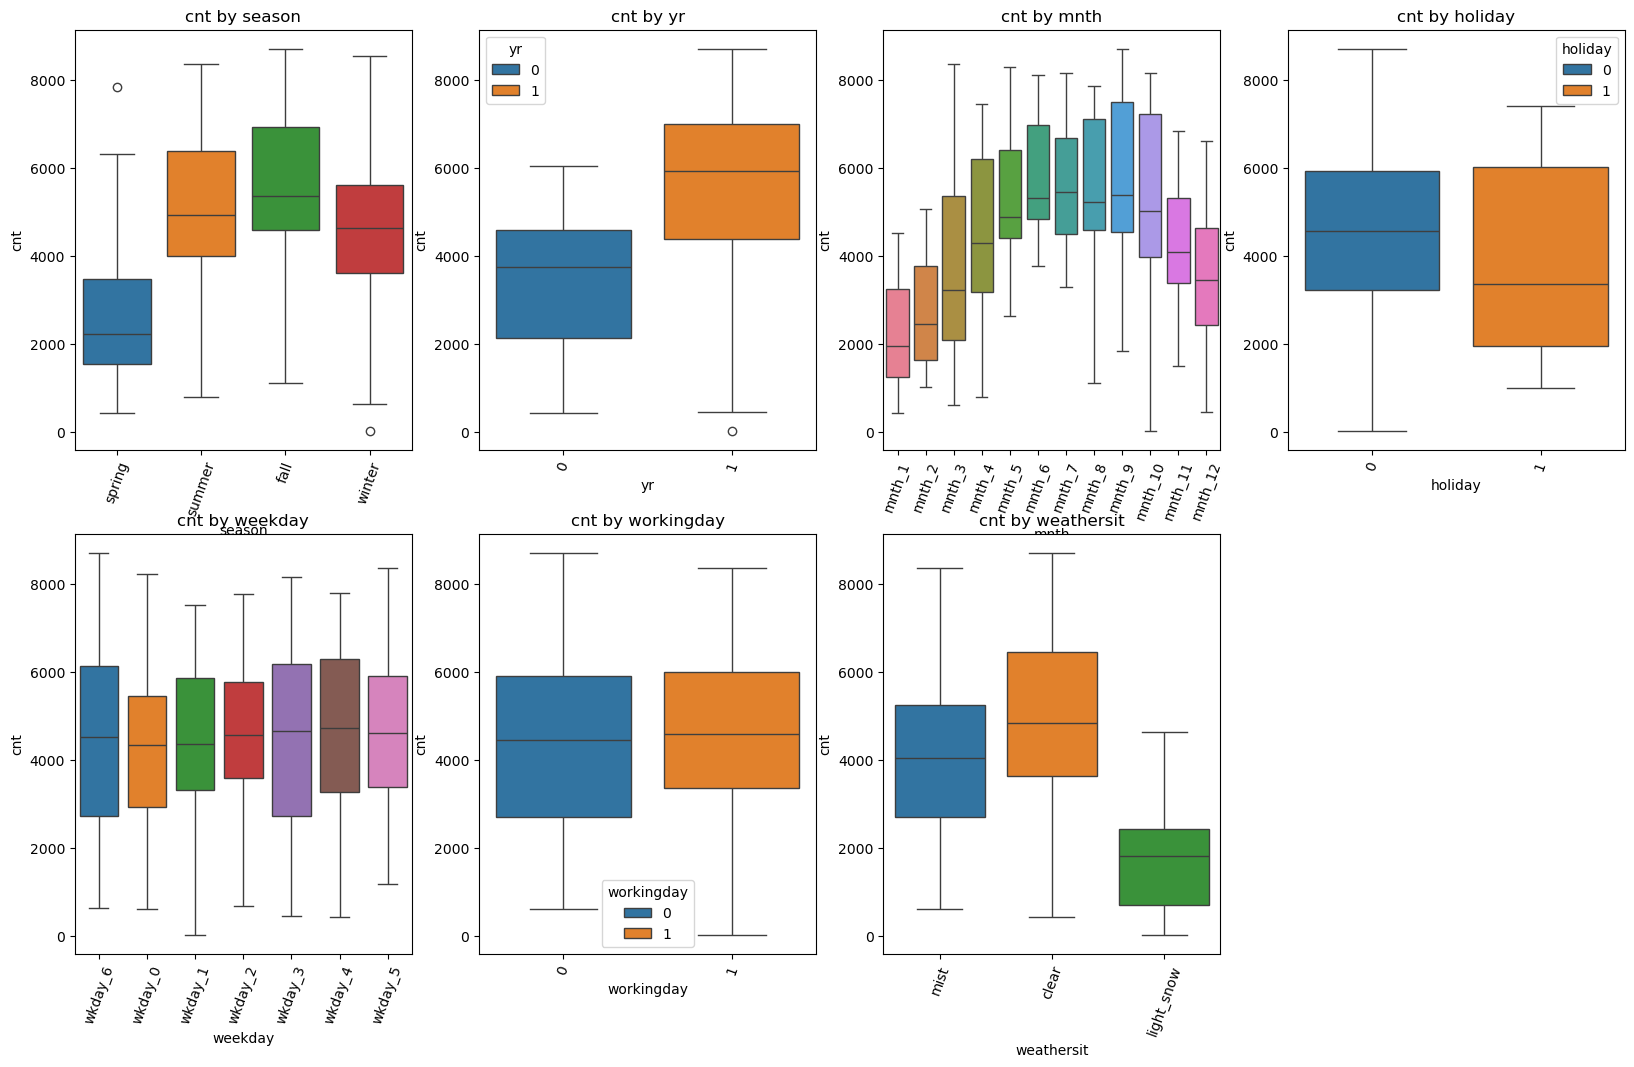

In [627]:
# Visualizing all the categorical variables
plt.figure(figsize=(20, 12))
for i in range(len(cate_var_list)):
    plt.subplot(2,4, i+1)
    sns.boxplot(data=BS1, x=cate_var_list[i], y='cnt', hue=cate_var_list[i])
    plt.title('cnt by {}'.format(cate_var_list[i]))
    plt.xticks(rotation=70)
plt.show()

We can also compare these variables in 2018 and 2019 to see the differences

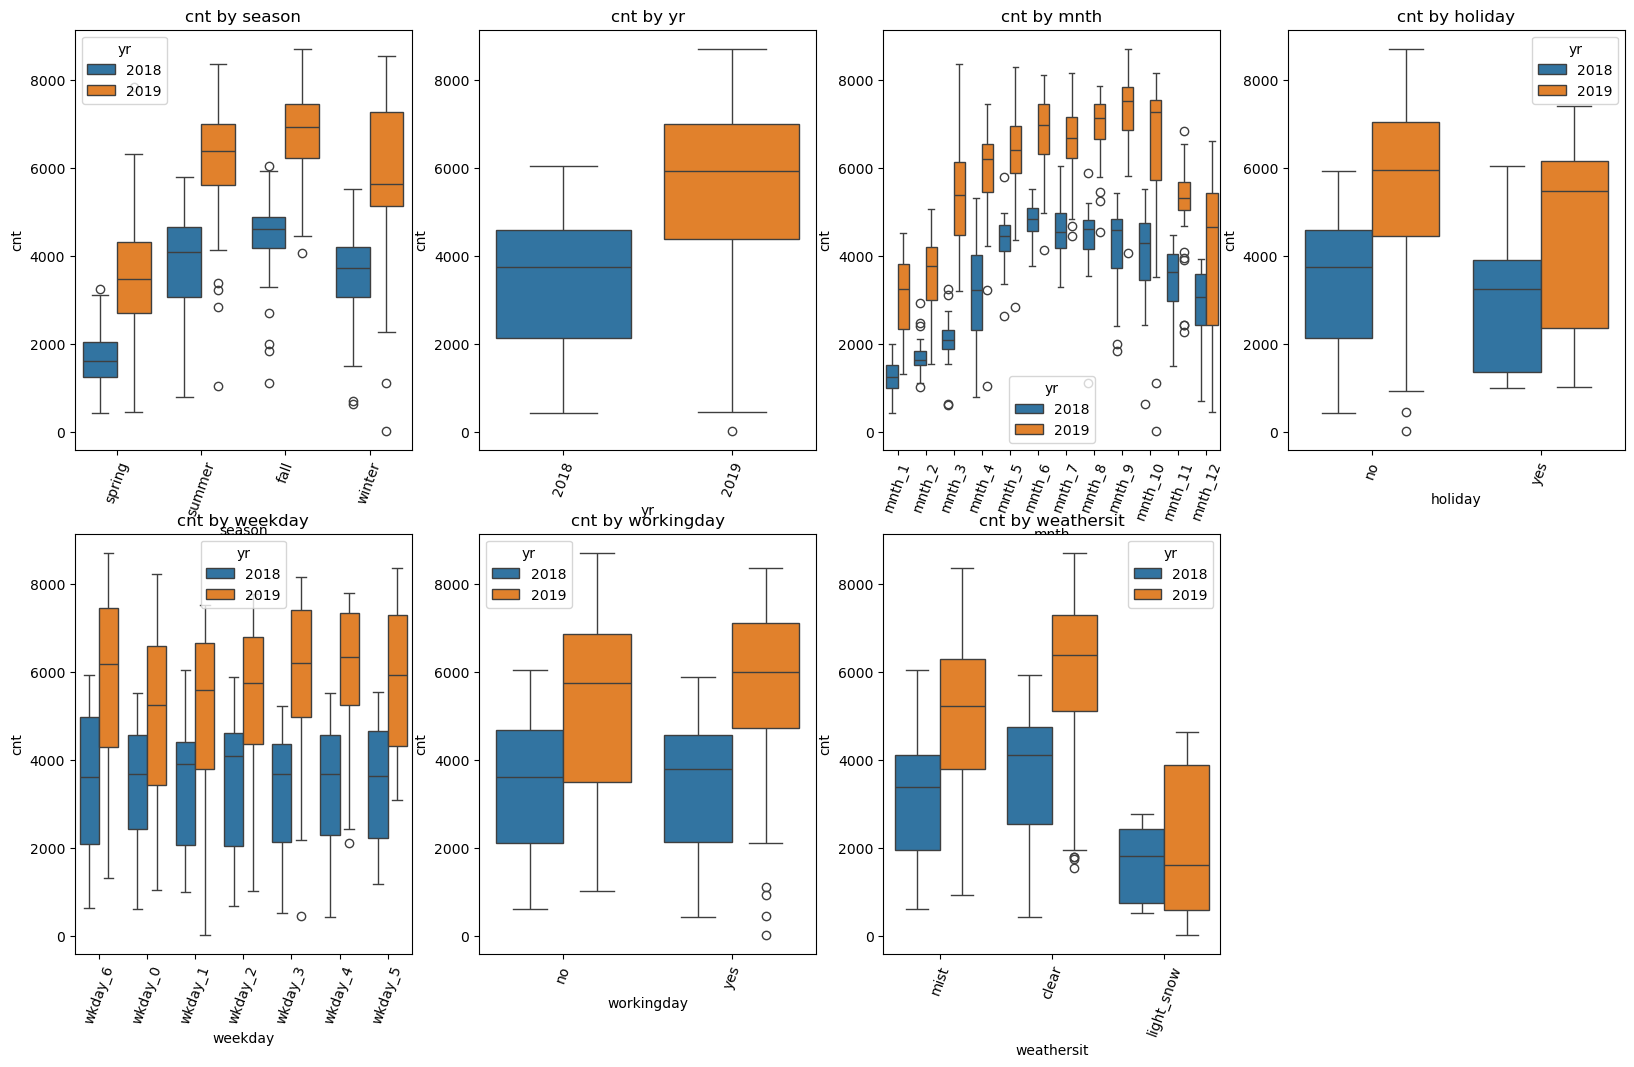

In [581]:
# Visualizing all the categorical variables in both 2018 and 2019
plt.figure(figsize=(20, 12))
for i in range(len(cate_var_list)):
    plt.subplot(2,4, i+1)
    sns.boxplot(data=BS, x=cate_var_list[i], y='cnt', hue='yr')
    plt.title('cnt by {}'.format(cate_var_list[i]))
    plt.xticks(rotation=70)
plt.show()

#### -> Observation: Cnt in 2019 is better than that in 2018

## Step 3: Data Preparation

- Converting categorical variables to numeric variables
   - Converting binary variables to the numeric ones {No: 0, Yes: 1)
   - Transforming multi-value categorical variables with dummy format
- Checking for linear relationship by pairplot and headmap


### Converting categorical variables to numeric variables:

- Converting binary variables to the numeric ones {No: 0, Yes: 1):

In [582]:
# Function to convert categorical to numeric variable {'yes':1, 'no':0}
def convert_yes_no_to_bin(x: str) -> int:
    # yes: 1
    # no: 0
    if x in [0 , 1]:
        return x
    else:
        dict = {'yes':1, 'no':0}
        return dict[x]

# Function to convert 'yr' to binary [0, 1], {'2018': 0, '2019':1}
def convert_year_to_bin(yr: str) -> int:
    # 2018: 0
    # 2019: 1
    if yr in [0, 1]:
        return yr
    else: 
        dict = {'2018': 0, '2019' :1}
        return dict[yr]


In [583]:
# Converting 'yr' to binary [0, 1], {'2018': 0, '2019':1}
BS1['yr'] = BS1.yr.apply(lambda x: convert_year_to_bin(x))

# Converting 'holiday' to binary
BS1['holiday'] = BS1['holiday'].apply(lambda x: convert_yes_no_to_bin(x))

# Converting 'workingday' to binary
BS1['workingday'] = BS1['workingday'].apply(lambda x: convert_yes_no_to_bin(x))

- Transforming multi-value categorical variables to dummy variables:

In [584]:
# Transforming 'season' to dummy variables:
df = BS1.copy()
var_list_to_dummy = ['season', 'mnth', 'weekday','weathersit']
for col in var_list_to_dummy:
    dummies = pd.get_dummies(BS1[col], drop_first=True).astype(int)
    df = df.join(dummies)
    df = df.drop(columns=col)

# dropping the original columns
# df.drop(columns=var_list_to_dummy, inplace=True)

In [585]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,spring,...,mnth_8,mnth_9,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,light_snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,1,0,0,0,0,0


In [586]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,spring,...,mnth_8,mnth_9,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,light_snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,1,0,0,0,0,0


- Checking for linear relationship by pairplot/ headmap

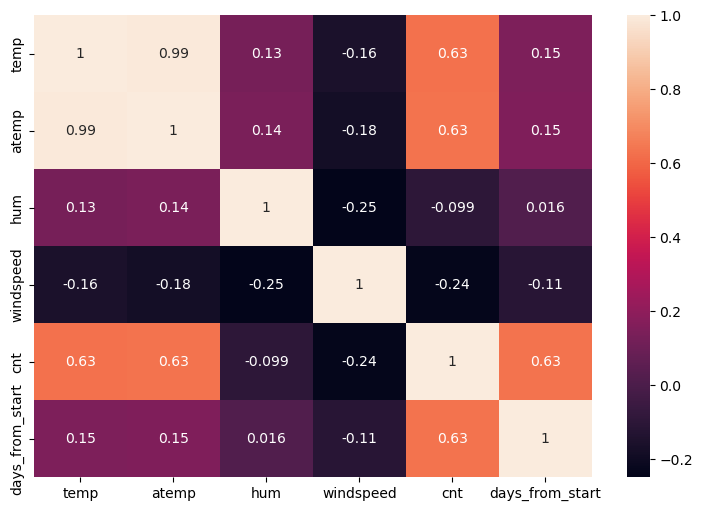

In [587]:
plt.figure(figsize=(9, 6))
sns.heatmap(df[num_var_list].corr(), annot=True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

In [588]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [589]:
df_train.shape, df_test.shape

((510, 31), (219, 31))

In [590]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,spring,...,mnth_8,mnth_9,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,light_snow,mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,653,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,576,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,426,1,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,728,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,482,0,...,0,0,0,0,0,0,0,1,0,1


### Rescaling the Features 

We will use MinMax scaling.

In [591]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [592]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt','days_from_start']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,spring,...,mnth_8,mnth_9,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,light_snow,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,0,0,0,0,1,0,1


### Dividing into X and Y sets for the model building

In [593]:
y_train = df_train.pop('cnt') # target variable is 'cnt'
X_train = df_train

## Step 5: Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [594]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [595]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [596]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 16),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_from_start', True, 1),
 ('spring', False, 6),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mnth_10', False, 14),
 ('mnth_11', False, 3),
 ('mnth_12', False, 2),
 ('mnth_2', False, 15),
 ('mnth_3', False, 9),
 ('mnth_4', False, 11),
 ('mnth_5', False, 10),
 ('mnth_6', False, 13),
 ('mnth_7', False, 5),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('wkday_1', False, 17),
 ('wkday_2', False, 18),
 ('wkday_3', False, 20),
 ('wkday_4', False, 21),
 ('wkday_5', False, 19),
 ('wkday_6', False, 7),
 ('light_snow', True, 1),
 ('mist', False, 4)]

In [597]:
# Features selected by RFE
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_from_start',
       'summer', 'winter', 'mnth_9', 'light_snow'],
      dtype='object')

In [598]:
# Features rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'spring', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'wkday_1', 'wkday_2', 'wkday_3', 'wkday_4', 'wkday_5', 'wkday_6',
       'mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [599]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [600]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [601]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [602]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          5.20e-185
Time:                        22:06:52   Log-Likelihood:                 490.79
No. Observations:                 510   AIC:                            -959.6
Df Residuals:                     499   BIC:                            -913.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2662      0.026     

Drop the feature 'days_from_start' because it has high p-value (0.3 > 0.05) 

In [603]:
X_train_new = X_train_rfe.drop(columns=['days_from_start'])

Rebuilding the model without `days_from_start`

In [604]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [605]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [606]:
#Let's see the summary of our new linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          5.16e-186
Time:                        22:06:53   Log-Likelihood:                 490.26
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     500   BIC:                            -918.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.026     10.254      0.0

In [607]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'mnth_9', 'light_snow'],
      dtype='object')

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [608]:
# drop the column 'const' 
X_train_new = X_train_new.drop(columns=['const']) 

In [609]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.01
2,temp,7.10
4,windspeed,3.53
0,yr,2.01
6,winter,1.64
5,summer,1.58
7,mnth_9,1.20
8,light_snow,1.09
1,holiday,1.04


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF (10.01), we can drop it

In [610]:
# drop the feature 'hum'
X_train_new = X_train_new.drop(columns=['hum'])

Rebuilding the model without `hum`

In [611]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [612]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [626]:
#Let's see the summary of our new linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          1.42e-171
Time:                        22:35:34   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0872      0.017      5.001      0.0

In [614]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,summer,1.55
5,winter,1.35
6,mnth_9,1.20
7,light_snow,1.06
1,holiday,1.03


As you can see, both VIF and p-values are fine now. We can keep the above features

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [615]:
y_train_pred = lm.predict(X_train_lm)

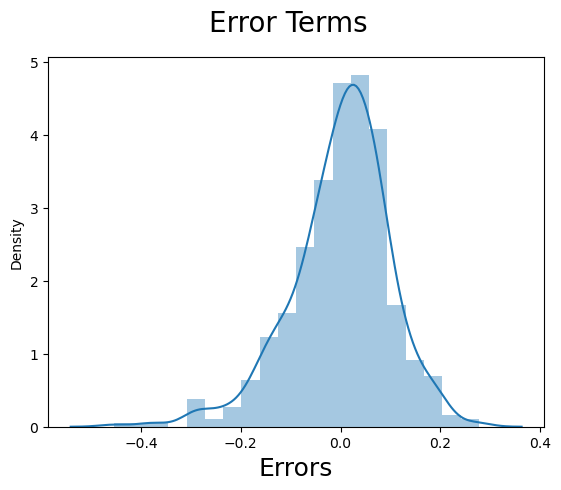

In [616]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms.

#### Applying the scaling on the test sets

In [617]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt','days_from_start']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,spring,...,mnth_8,mnth_9,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,light_snow,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.252747,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.734890,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.410714,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.303571,0,...,1,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.208791,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing df_test into X_test and y_test

In [618]:
y_test = df_test.pop('cnt')
X_test = df_test

In [619]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [620]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

In [625]:
# r2_Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7724376516730699

With R2_score = 0.77:
- 77.24% of the variation in bike demand (cnt) is explained by the model.
- This is a fairly strong model but not perfect.
- Around 22.76% of the variance is still unexplained, meaning there are factors missing from the model.

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

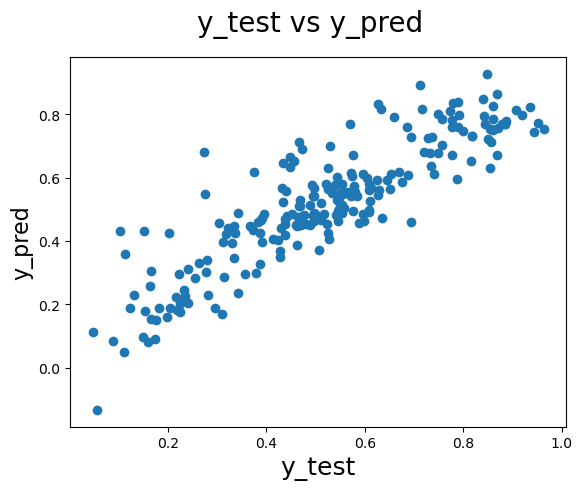

In [621]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

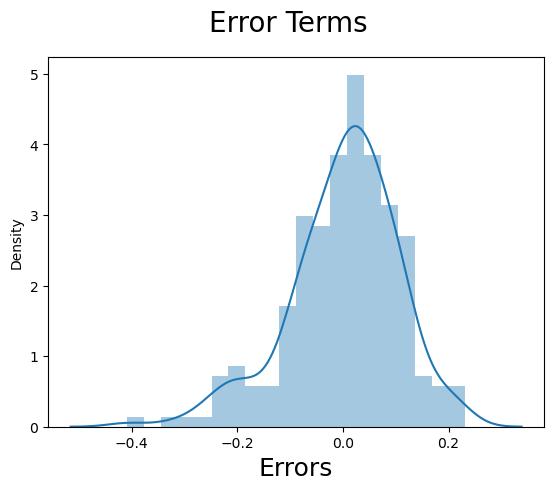

In [632]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

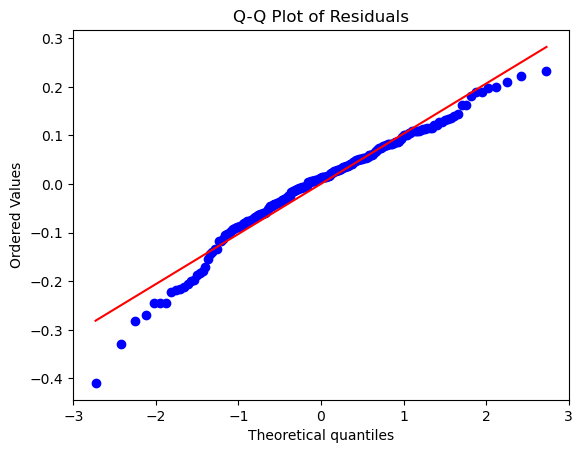

In [636]:
# Q-Q Plot 
import scipy.stats as stats
residuals = y_test - y_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### Inferences:
    - The model captures general trends well but struggles with extreme values.
    - Prediction errors are larger for high & low bike rental days.
    - Further tuning is needed for better accuracy.

## The equation of our best fitted line:

In [623]:
# print the equation for linear regression
equation = ""
for k, v in lm.params.to_dict().items():
    if k == 'const':
        equation += str(round(v, 2))
    elif v > 0: 
        equation +=  f' + {round(v, 2)}*{k} '
    else: 
        equation +=  f' {round(v, 2)}*{k} '
print ("The equation:\n cnt = ", equation)

The equation:
 cnt =  0.09 + 0.23*yr  -0.09*holiday  + 0.57*temp  -0.15*windspeed  + 0.08*summer  + 0.13*winter  + 0.09*mnth_9  -0.25*light_snow 


### The equation of our best fitted line: 
cnt =  0.09 + 0.23\*yr - 0.09\*holiday  + 0.57\*temp  - 0.15\*windspeed  + 0.08\*summer  + 0.13\*winter  + 0.09\*mnth_9 - 0.25\*light_snow 